In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import (user, password, host, port, database)

In [3]:
from sqlalchemy import create_engine

engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [16]:
salaries_df = pd.read_sql("select * from salaries", conn)

y = salaries_df['emp_no']
x = salaries_df['salary']
salaries_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [82]:
titles_df = pd.read_sql("select * from titles", conn)

salaries_df['Title'] = titles_df['title']
grouped_df = salaries_df.groupby('Title').mean()
salary_vs_title = grouped_df.drop(columns='emp_no')
salary_vs_title

,salary
Title,
Assistant Engineer,40006
Engineer,40054
Manager,56724
Senior Engineer,78228
Senior Staff,65828
Staff,60117
Technique Leader,40000


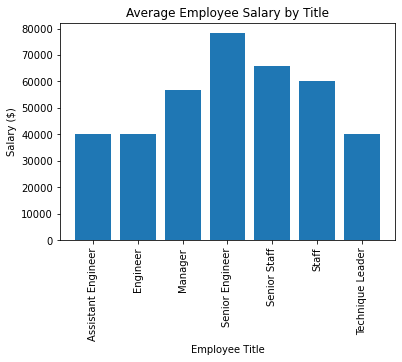

In [100]:
x_axis = salary_vs_title.index
y_axis = salary_vs_title['salary']

plt.xlabel("Employee Title")
plt.ylabel("Salary ($)")
plt.title("Average Employee Salary by Title")
plt.bar(x_axis, y_axis)

plt.xticks(rotation="vertical")

plt.savefig("")
plt.show()

Text(0, 0.5, 'Salary ($)')

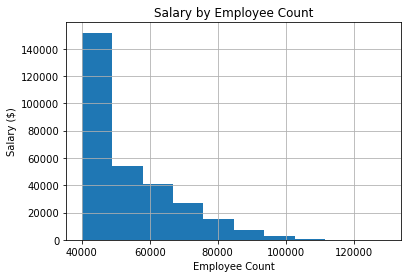

In [80]:
salaries_df.hist(column='salary')
plt.title('Salary by Employee Count')
plt.xlabel('Employee Count')
plt.ylabel('Salary ($)')
